# Minería de datos
# Métodos factoriales o de reducción de dimensión

## Campo Elías Pardo

# Análisis en componentes principales canónico
El análisis en componentes principales (ACP) se presenta en Minería de datos como un método de reducción de dimensión, pero también es una técnica de aprendizaje no supervisado. La presentación en este cuaderno es un resumen tomado del capítulo tres del libro [Estadística descriptiva multivariada](https://bit.ly/3mD9rEY). Se utiliza un ejemplo muy pequeño (de juguete) para entenderlo. Se utiliza el adjetivo canónico para diferenciarlo del ACP generalizado, que es un marco general para los métodos factoriales o en ejes principales.

## Ejemplo café

La tabla de datos se encuentra en el paquete de R FactoClass:


In [9]:
library(FactoClass)
data(cafe)
cafe

,Color,DA,EA,pH,AcidezT,Cafeina,AcidosCl,D2325,D2272,Intensidad,Aroma,Cuerpo,Acidez,Amargo,Astringencia,Impresion
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ExCl,298,385.1,25,5.02,11.7,1.40,2.74,-0.101,-0.057,7.72,7.00,6.84,5.02,5.04,5.36,7.46
C40M,361,481.3,41,5.11,6.5,0.81,1.62,-0.058,-0.038,6.02,5.42,6.22,4.34,4.60,4.78,6.24
C40C,321,422.6,40,5.12,5.8,0.80,1.61,-0.057,-0.038,6.48,5.98,6.44,4.58,4.82,4.80,6.12
C20M,335,444.3,33,5.05,8.8,1.10,2.20,-0.079,-0.045,6.82,6.44,6.70,4.62,4.38,4.80,6.04
C20C,314,368.7,32,5.04,9.3,1.10,2.19,-0.080,-0.046,7.08,6.20,6.72,4.78,4.94,4.90,6.22
ExOs,186,346.6,28,5.31,8.7,1.35,2.30,-0.049,-0.064,7.66,7.42,6.98,5.12,5.18,5.22,7.40
O40M,278,422.6,43,5.45,4.9,0.80,1.35,-0.025,-0.037,6.18,5.82,6.26,4.00,4.46,4.96,5.90
O40C,238,403.0,42,5.33,5.2,0.79,1.36,-0.026,-0.036,6.84,6.56,6.82,4.30,4.96,4.84,6.94
O20M,226,368.7,36,5.33,6.7,1.10,1.83,-0.035,-0.051,6.66,7.06,6.70,4.64,5.00,4.90,6.90


Para el ejemplo se toman las 10 primeras filas y las tres primeras columnas:

In [10]:
Y<-cafe[1:10,1:3]
Y

,Color,DA,EA
,<int>,<dbl>,<int>
ExCl,298,385.1,25
C40M,361,481.3,41
C40C,321,422.6,40
C20M,335,444.3,33
C20C,314,368.7,32
ExOs,186,346.6,28
O40M,278,422.6,43
O40C,238,403.0,42
O20M,226,368.7,36


El ACP empieza asociando a la tabla de datos dos representaciones geométricas de los datos. En la primera vemos las filas de la tabla como vectores de 3 dimensiones, se tienen entonces, 10 puntos de $\mathbb{R}^3$, y los ejes son las columnas. 

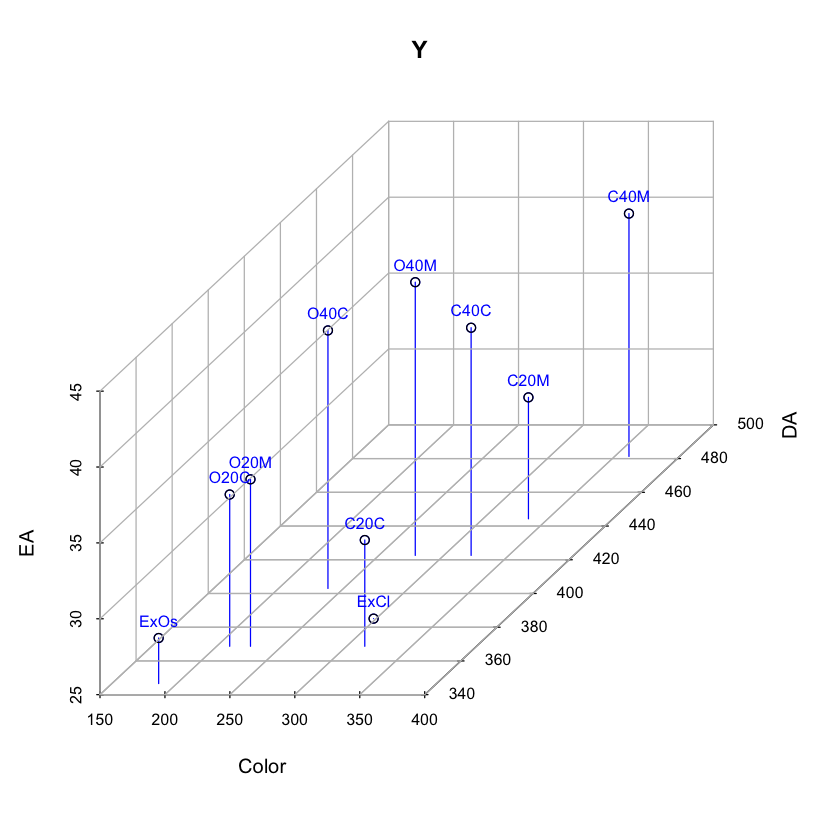

In [11]:
Y3D<-scatterplot3d(Y,main="Y",type="h",color="blue",box=FALSE,las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="blue",pos=3); 


Es esta representación están las mismas cifras de la tabla, incluida la metainformación (etiquetas de las filas y las columnas). La ventaja es que nosotros entendemos más las gráficas que los números de una tabla. Por ejemplo rápidamente vemos que los cafés ExOs y C40M son los más diferentes y que C20C y C20M los más parecidos.

Una imagen como esta se denomina nube de puntos fila o individuos. La posición de la nube de puntos se obtiene calculando su centro de gravedad (término de la Física), que es el valor de la media en una variable y vector de medias en varias variable


In [25]:
# Centro de gravedad;
n<-nrow(Y);n; 
g<-(1/n)*rowSums(t(Y));g; # igual a colMeans(Y);


[1] 10

Color     DA     EA 
276.70 401.16  35.50

El centro de gravedad es el punto de referencia para comparar los datos. Entonces se traslada el origen de las coordenadas al centro de gravedad. Esto equivale a restarle el centro de gravedad a todos los puntos y se denomina el centrado de los datos. En la gráfica se pierde la información del centro de gravedad, por lo que se guardan las coordenadas del vector.

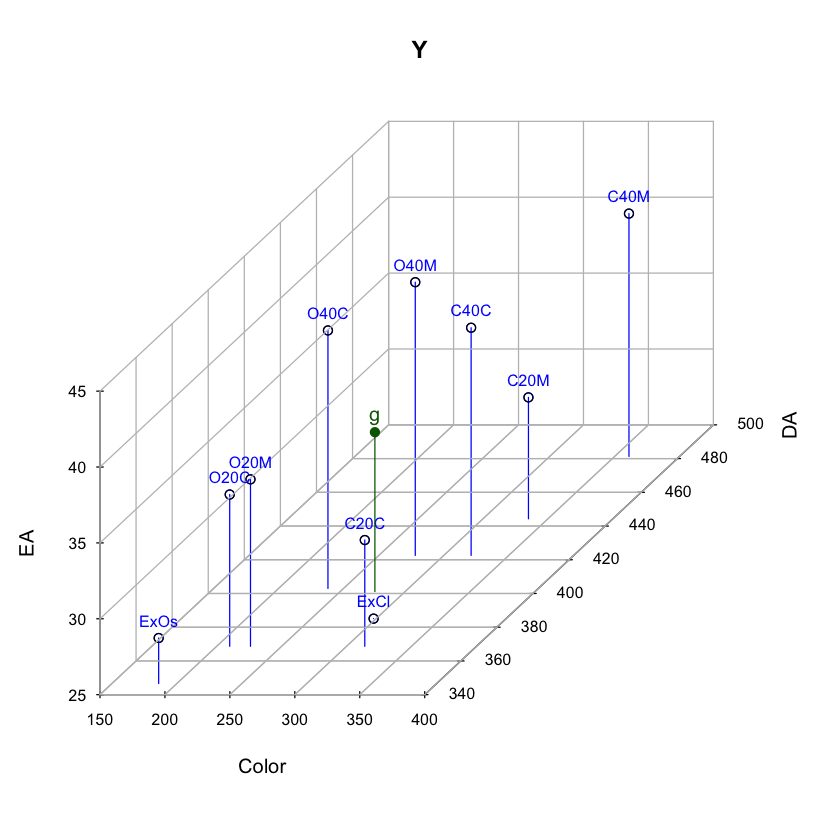

In [14]:
# gráfica con el centro de gravedad;
par(las=1);
# grafica;
Y3D<-scatterplot3d(Y,main="Y",type="h",color="blue",box=FALSE,las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="blue",pos=3); 
# para incluir g en la grafica;
Y3D$points3d(t(g),pch=19,col="darkgreen",type = "h");
text(Y3D$xyz.convert(t(g)),labels="g",pos=3,col="darkgreen");


In [31]:
# Centrado de los datos
unos<-rep(1,n) # vector de n unos;
Yc<-Y-unos%*%t(g)
Yc<-as.matrix(Yc)
Yc

,Color,DA,EA
ExCl,21.3,-16.06,-10.5
C40M,84.3,80.14,5.5
C40C,44.3,21.44,4.5
C20M,58.3,43.14,-2.5
C20C,37.3,-32.46,-3.5
ExOs,-90.7,-54.56,-7.5
O40M,1.3,21.44,7.5
O40C,-38.7,1.84,6.5
O20M,-50.7,-32.46,0.5
O20C,-66.7,-32.46,-0.5


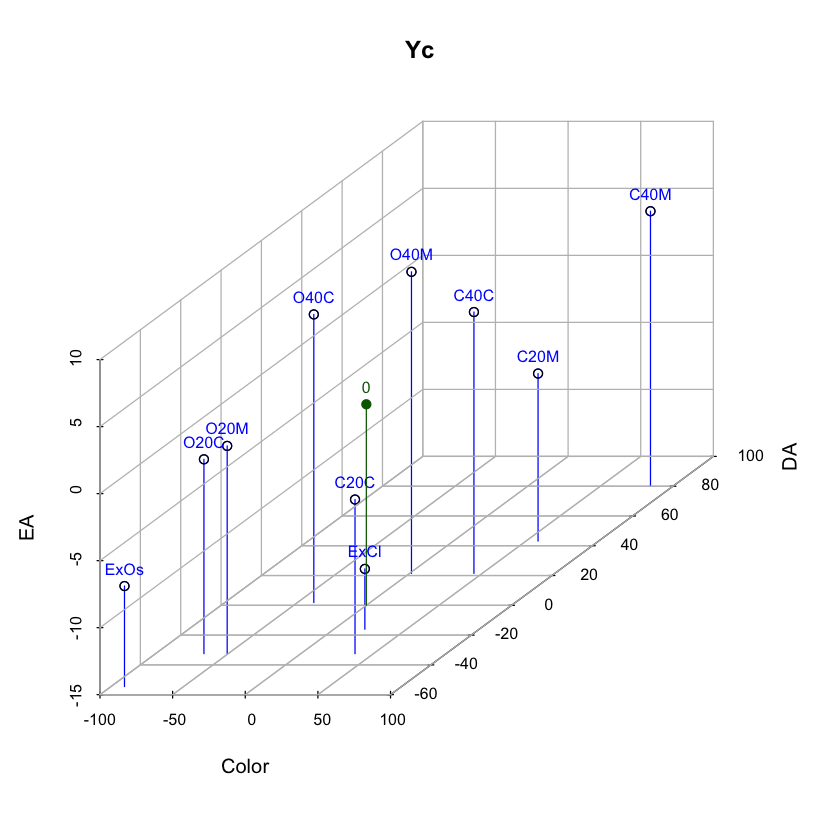

In [16]:
# grafica de datos centrados;
Yc3D<-scatterplot3d(Yc,main="Yc",type="h",color="blue",box=FALSE,las=1);
Yc3D$points3d(Yc,pch=1);
addgrids3d(Yc,grid=c("xy","xz","yz"));
text(Yc3D$xyz.convert(Yc),labels=rownames(Yc),cex=0.8,col="blue",pos=3);
Yc3D$points3d(t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(Yc3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,
     col="darkgreen",cex=0.8);


La forma de la gráfica igual, obsérvese que los valores de las coordenadas son diferentes (positivos y negativos). Los puntos que más distantates tienen sigonos opuestos de las coordenadas:

In [19]:
rbind(Yc["ExOs",], Y["C40M",])

,Color,DA,EA
,<dbl>,<dbl>,<dbl>
ExOs,-90.7,-54.56,-7.5
C40M,361.0,481.30,41.0


La dispersión de la nube de puntos se resume en la inercia (término derivado del momento de la inercia de la Física), que es igual a la suma de las varianzas de las variables.

Lo que sigue en el ACP es obtener nuevos ejes ortogonales y ordenados por las varianzas (inercias proyectadas). El primer eje es el de máxima varianza y así sucesivamente. Las direcciones de los nuevos ejes se obtienen con los vectores propios unitarios asociados a los respectivos valores propios de la matriz de varianzas y covarianzas.

In [20]:
V <- var(Y)*9/10
V
# valores y vectores propios


,Color,DA,EA
Color,3105.810,1738.388,60.95
DA,1738.388,1560.188,129.36
EA,60.950,129.360,33.45


In [24]:
des<-eigen(V);#des # calculo de valores y vectores propios    
lambda<-des$values     
U<-des$vectors #matriz con vectores propios en columnas
rownames(U)<-rownames(V)
colnames(U)<-c("Eje1","Eje2","Eje3");
round(lambda,1); round(U,3)      


[1] 4238.9  444.2   16.3

,Eje1,Eje2,Eje3
Color,0.838,0.541,0.074
DA,0.545,-0.822,-0.165
EA,0.029,-0.179,0.984


Las coordenadas sobre los nuevos ejes son:

In [34]:
F <- Yc %*% U
round(F,1)


,Eje1,Eje2,Eje3
ExCl,8.8,26.6,-6.1
C40M,114.5,-21.3,-1.6
C40C,48.9,5.5,4.1
C20M,72.3,-3.5,-5.3
C20C,13.5,47.5,4.7
ExOs,-106.0,-2.9,-5.0
O40M,13.0,-18.3,3.9
O40C,-31.2,-23.6,3.2
O20M,-60.2,-0.8,2.1
O20C,-73.6,-9.3,0.0


In [ ]:
Nube de puntos soportada sobre los nuevos ejes:

# Análisis en componentes principales generalizado

## Diagrama de dualidad y fórmulas

**Diagrama de dualidad**

![Diagrama de dualidad del ACP generalizado](./DuDiMDpn.png)

![Formulas del ACP generalizado](FormulasAcpXMN.png)


![Formulas ACP(X), nuevos ejes](./FormulasACP(XMN)2.png)

**ACP generalizado en ade4: función as.dudi**

![ACP generalizado en ade4: función as.dudi](./Diagramas/Diagasdudi.png)

# ACP canónico: ACP(X,Ip,1/n In)

**Diagrma de dualidad del ACP canónico**

Ver tablero

**ACP canónico en ade4: función dudi.pca**

![ACP canónico en ade4](./Diagramas/DiagACPcan.png)

## Ejemplo: resultados de los componentes del examen de admisión

Ver capítulo 3 libro EDM

**Librerias**

In [1]:
library(FactoClass)
library(factoextra)


Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
data(admi)
#?admi
head(admi)
dim(admi)

,carr,mate,cien,soci,text,imag,exam,gene,estr,orig,edad,niLE,niMa,stra,age
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Biol,12.03,10.84,12.08,10.62,10.68,696.4424,F,alto,Bogo,a17,noLE,siMa,E4,17
2,Biol,11.75,11.16,11.71,10.35,11.60,703.2127,M,medio,Bogo,a17,noLE,siMa,E3,17
3,Biol,10.03,10.51,10.70,9.57,8.80,503.9774,F,bajo,Bogo,a18,siLE,siMa,E2,18
4,Biol,11.48,11.48,11.71,10.91,11.60,714.7407,F,bajo,Bogo,a18,noLE,siMa,E2,18
5,Biol,11.21,10.84,12.08,11.21,11.26,693.1449,M,medio,Bogo,a17,noLE,siMa,E3,17
6,Biol,11.75,10.84,11.36,10.91,10.96,675.0821,F,medio,Bogo,a17,noLE,siMa,E3,17


[1] 445  15

**Se realiza ACP canónico de los 445 admitidos con las 5 componentes del examen**

In [3]:
Y = admi[,2:6]
head(Y)

,mate,cien,soci,text,imag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.03,10.84,12.08,10.62,10.68
2,11.75,11.16,11.71,10.35,11.60
3,10.03,10.51,10.70,9.57,8.80
4,11.48,11.48,11.71,10.91,11.60
5,11.21,10.84,12.08,11.21,11.26
6,11.75,10.84,11.36,10.91,10.96


**ACP**

In [4]:
acp = dudi.pca(Y,scannf=FALSE,nf=3)
class(acp)
acp

[1] "pca"  "dudi"

Duality diagramm
class: pca dudi
$call: dudi.pca(df = Y, scannf = FALSE, nf = 3)

$nf: 3 axis-components saved
$rank: 5
eigen values: 1.852 1.025 0.8697 0.638 0.6157
  vector length mode    content       
1 $cw    5      numeric column weights
2 $lw    445    numeric row weights   
3 $eig   5      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       445  5    modified array      
2 $li        445  3    row coordinates     
3 $l1        445  3    row normed scores   
4 $co        5    3    column coordinates  
5 $c1        5    3    column normed scores
other elements: cent norm 

**Selección del subespacio de análisis**
¿Cuántos ejes retener?



In [5]:
#?inertia.dudi


In [6]:
ineracp = inertia(acp,T,T)
names(ineracp)

[1] "tot.inertia" "row.contrib" "row.abs"     "row.rel"     "row.cum"    
 [6] "col.contrib" "col.abs"     "col.rel"     "col.cum"     "nf"         
[11] "call"

In [7]:
round(ineracp$tot.inertia,2)

,inertia,cum,cum(%)
,<dbl>,<dbl>,<dbl>
Ax1,1.85,1.85,37.03
Ax2,1.02,2.88,57.53
Ax3,0.87,3.75,74.93
Ax4,0.64,4.38,87.69
Ax5,0.62,5.00,100.00


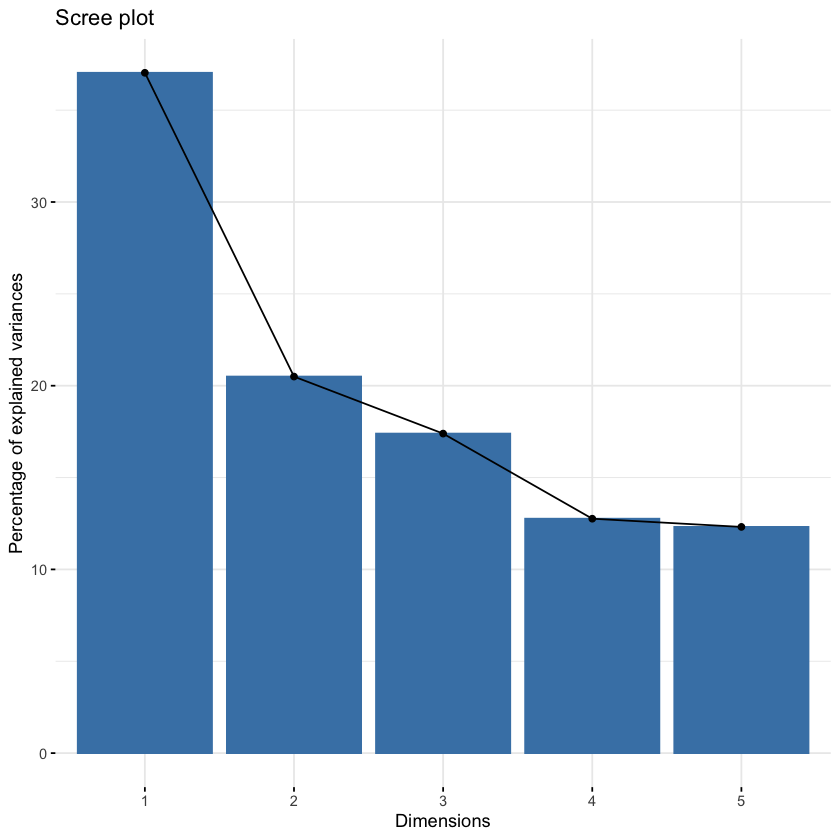

In [8]:
#barplot(acp$eig[5:1],horiz=TRUE)
fviz_eig(acp)

**Círculos de correlaciones**

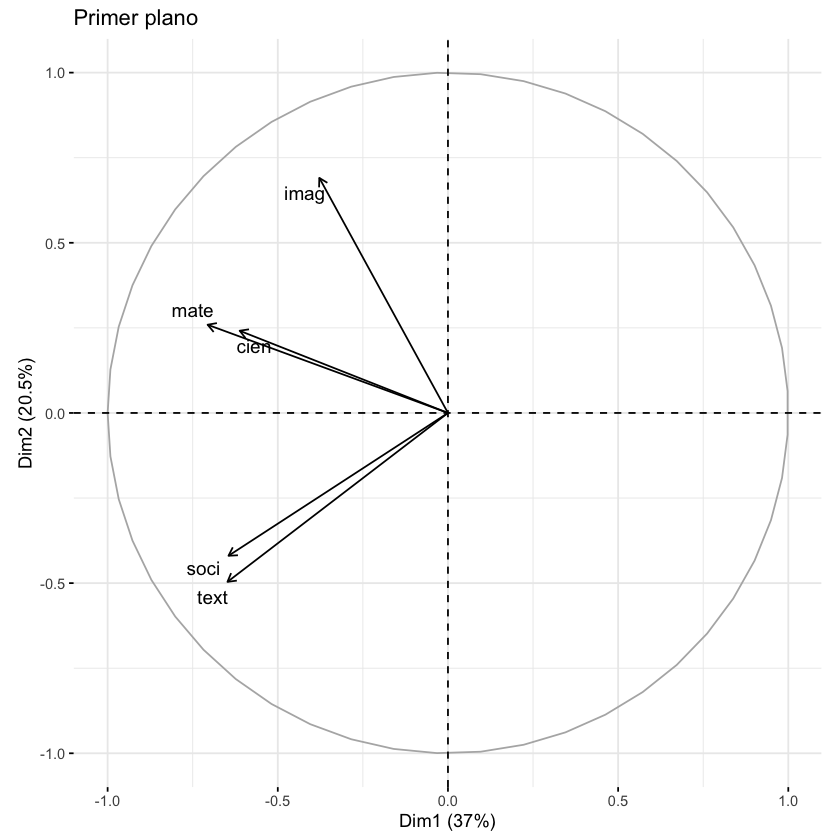

In [9]:
#s.corcircle(acp$co)
fviz_pca_var(acp,repel=TRUE,title="Primer plano ")

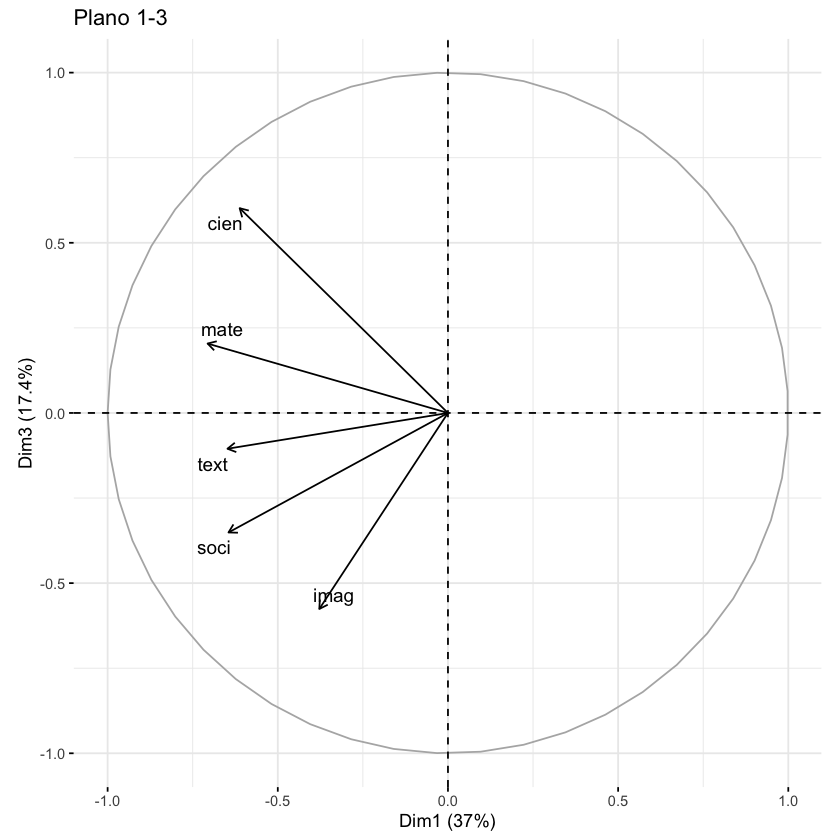

In [10]:
#s.corcircle(acp$co,1,3)
fviz_pca_var(acp,c(1,3),repel=TRUE,title="Plano 1-3")

**Primer plano factorial de los admitidos**

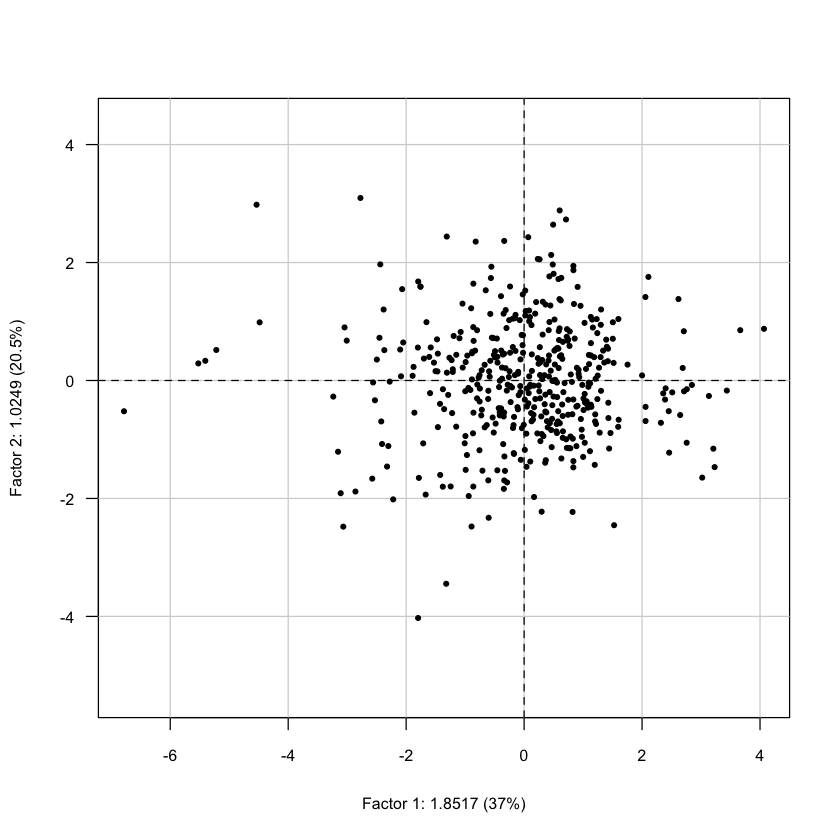

In [11]:
plot(acp,Tcol=FALSE,roweti="",cframe=1)


**Primer plano factorial de los admitivos con la carrera como variable cualitativa suplementaria**

In [12]:
supcarr <-supqual(acp,admi[,1])
names(supcarr)

[1] "wcat" "dis2" "coor" "tv"   "cos2" "scr"

In [13]:
#coordenadas y ayudas para la interpretación
#de las carreras como suplementarias
ayucarr=data.frame(ccar=supcarr$coor,valt=supcarr$tv,
           cos2=supcarr$cos2)

colnames(ayucarr)=paste(rep(c("ccar","valt","cos2"),each=3),
                        1:3,sep=".")
round(ayucarr,3)

,ccar.1,ccar.2,ccar.3,valt.1,valt.2,valt.3,cos2.1,cos2.2,cos2.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Biol,-0.036,-0.152,-0.080,-0.228,-1.287,-0.730,0.011,0.198,0.054
Esta,0.601,0.082,-0.109,3.885,0.711,-1.024,0.897,0.017,0.029
Farm,0.427,-0.315,0.068,2.928,-2.908,0.684,0.526,0.287,0.013
Fisi,-0.416,0.114,0.108,-3.064,1.127,1.160,0.812,0.061,0.055
Geol,-0.483,-0.010,-0.071,-2.507,-0.071,-0.540,0.956,0.000,0.021
Mate,-0.573,0.496,-0.014,-3.261,3.799,-0.114,0.437,0.328,0.000
Quim,0.280,-0.127,0.036,1.763,-1.071,0.331,0.745,0.152,0.012


Utilizando la función *plotfp{ade4}*. Es un zoom del plano de los admitidos, porque no se incluyen los individuos.

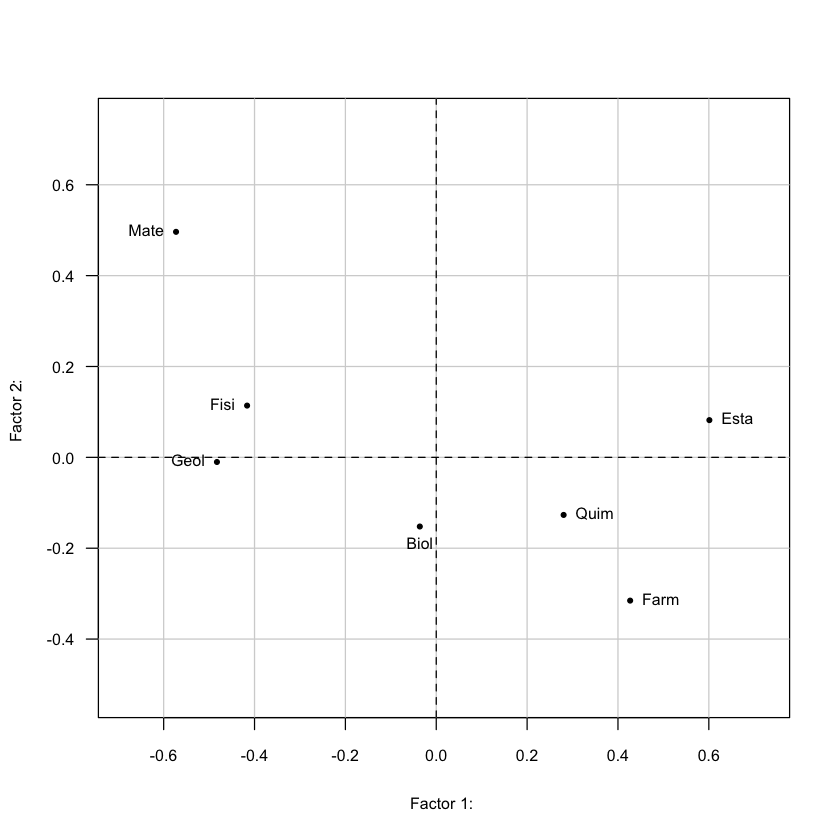

In [14]:
plotfp(supcarr$coor)


Utilizando funciones del paquete *factoextra*

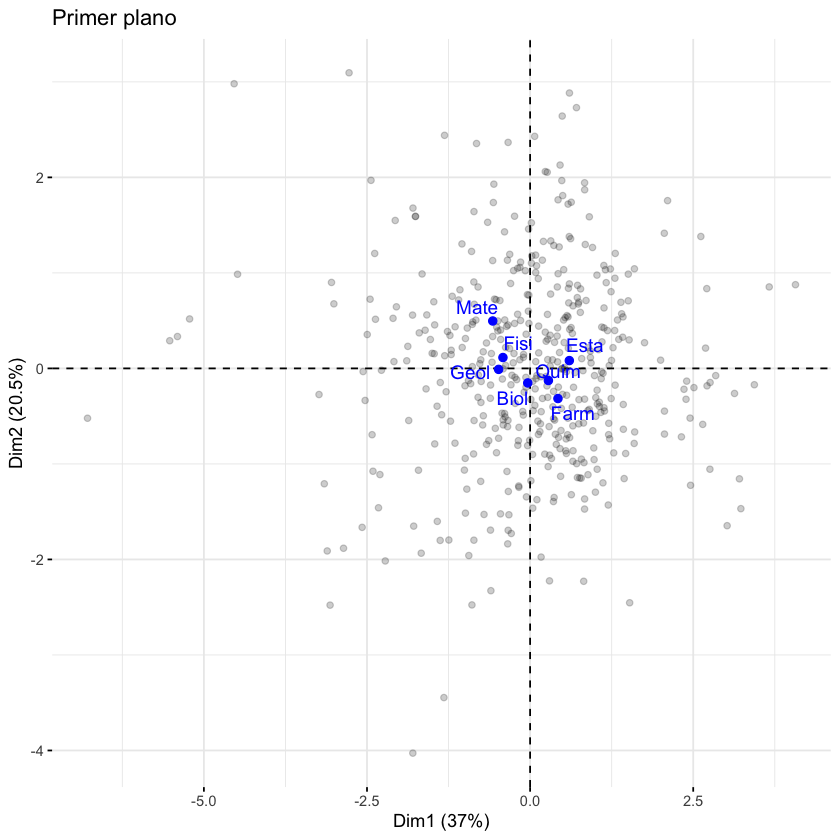

In [15]:
# primer plano de los admitidos
ginv=fviz_pca_ind(acp,label="NONE",title="Primer plano",alpha.ind=0.2)
# coordenadas de los centros de gravedad de las variables como ilustrativas
fviz_add(ginv,df = supcarr$coor,xlim=c(-1,1),repel=TRUE)

**Plano factorial 1-3**

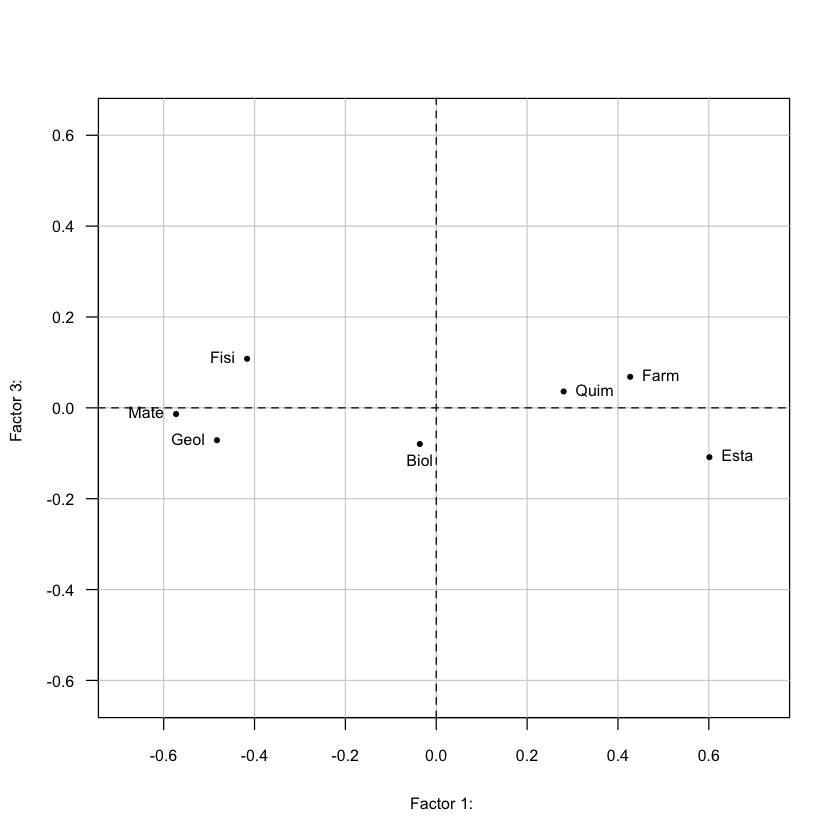

In [16]:
plotfp(supcarr$coor,1,3)

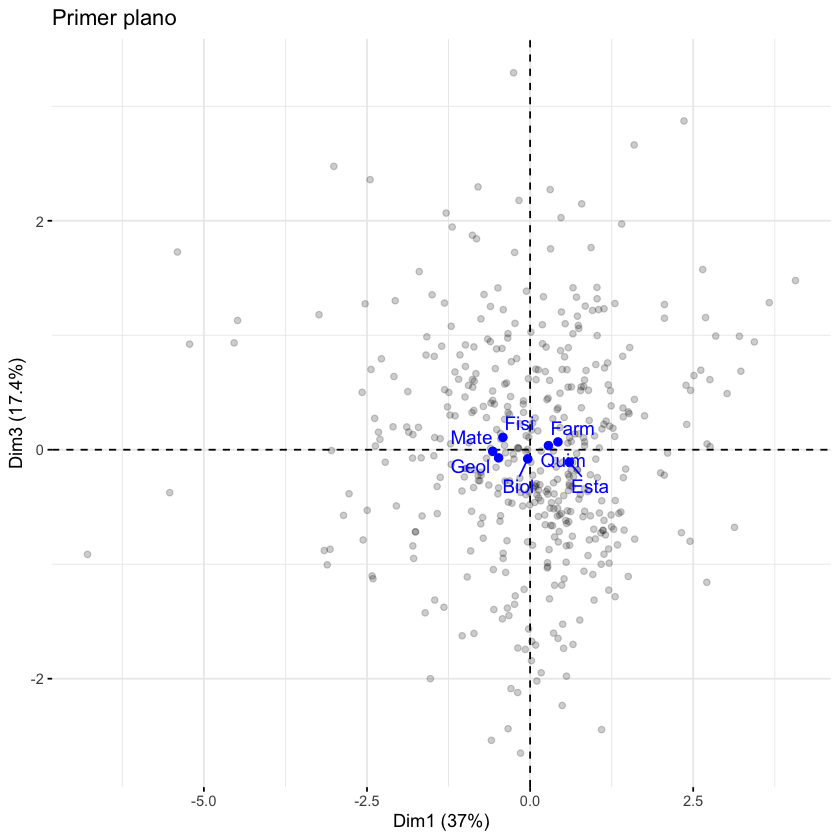

In [17]:
# primer plano de los admitidos
ginv=fviz_pca_ind(acp,axes=c(1,3),label="NONE",
                  title="Primer plano",alpha.ind=0.2)
# coordenadas de los centros de gravedad de las variables como ilustrativas
fviz_add(ginv,df = supcarr$coor[,c(1,3)],repel=TRUE)

# Imagen de matrices de covarianzas y de correlaciones

In [18]:
# Ejemplo matriz de covarianzas de los  resultado del examen
V<-cov(Y)
round(V,3)

,mate,cien,soci,text,imag
mate,1.284,0.387,0.237,0.272,0.240
cien,0.387,0.999,0.138,0.200,0.123
soci,0.237,0.138,0.748,0.319,0.091
text,0.272,0.200,0.319,0.982,0.046
imag,0.240,0.123,0.091,0.046,1.006


,mate,cien,soci,text,imag
mate,1.2839703,0.3866189,0.23719301,0.27187920,0.23968814
cien,0.3866189,0.9994763,0.13807260,0.20018415,0.12308876
soci,0.2371930,0.1380726,0.74806682,0.31860778,0.09125255
text,0.2718792,0.2001842,0.31860778,0.98245297,0.04608481
imag,0.2396881,0.1230888,0.09125255,0.04608481,1.00584585


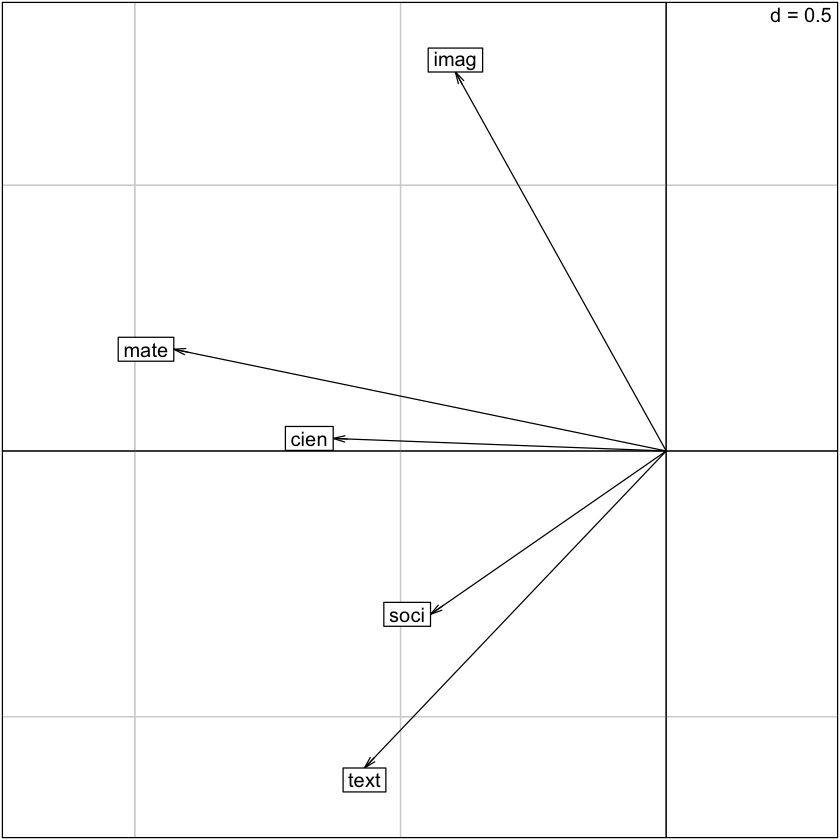

In [19]:
V # matriz de correlaciones
eigV <- eigen(V)
Lambda<-diag(eigV$values)
U<-eigV$vectors
G<-U%*%sqrt(Lambda)
rownames(G)<-colnames(V)
library(ade4)
s.arrow(G)

In [20]:
# desviaciones estándar
round(sqrt(diag(V)),2)

mate cien soci text imag 
1.13 1.00 0.86 0.99 1.00

In [21]:
# matriz de correlaciones
V <- cor(admi[,2:7])
round(as.dist(V),3)

      mate  cien  soci  text  imag
cien 0.341                        
soci 0.242 0.160                  
text 0.242 0.202 0.372            
imag 0.211 0.123 0.105 0.046      
exam 0.753 0.653 0.593 0.519 0.458

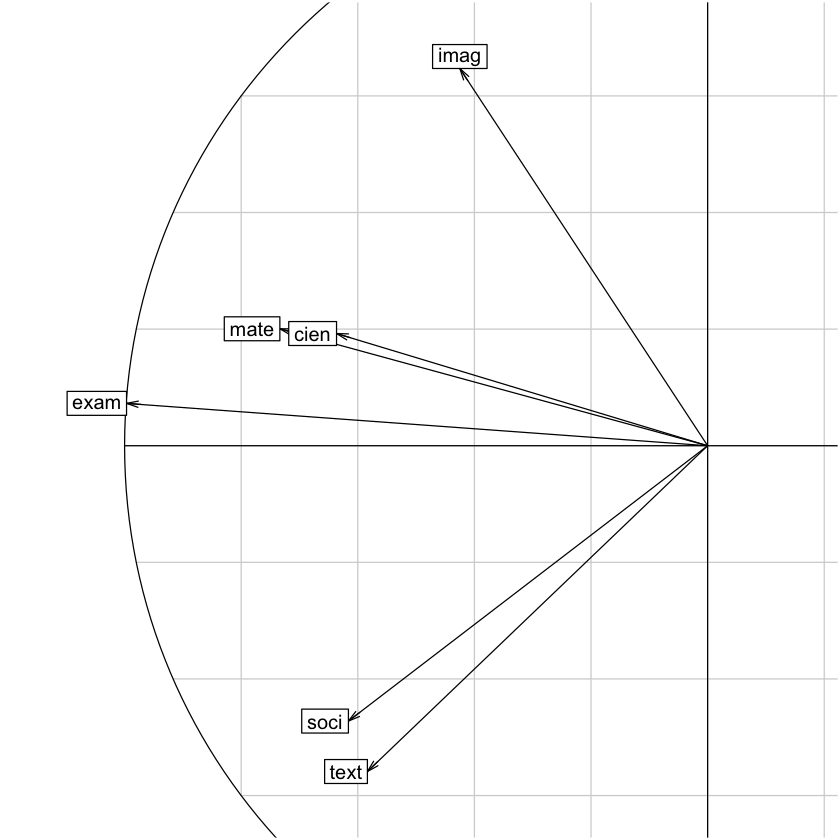

In [22]:
eigV <- eigen(V)
Lambda<-diag(eigV$values)
U<-eigV$vectors
G<-U%*%sqrt(Lambda)
rownames(G)<-colnames(V)
library(ade4)
s.corcircle(G,fullcircle = F)

# Análisis en coordenadas principales (ACO)

In [23]:
# Ejemplo distancias entre los 445 admitidos a partir de los resultados estandarizados 
#del examen, incluyento exam 
X<-scale(admi[,2:7])
D=dist(X)
round(as.matrix(D)[1:10,1:10],2)

,1,2,3,4,5,6,7,8,9,10
1,0.00,1.13,3.87,1.34,1.10,0.99,2.13,2.09,4.35,2.43
2,1.13,0.00,4.18,0.70,1.18,1.04,2.31,1.78,4.11,2.96
3,3.87,4.18,0.00,4.37,4.12,3.62,4.73,4.52,5.61,5.90
4,1.34,0.70,4.37,0.00,0.96,1.11,1.71,1.34,3.91,2.69
5,1.10,1.18,4.12,0.96,0.00,1.07,1.40,1.51,4.63,2.44
6,0.99,1.04,3.62,1.11,1.07,0.00,1.99,1.35,4.18,3.06
7,2.13,2.31,4.73,1.71,1.40,1.99,0.00,1.57,4.47,2.22
8,2.09,1.78,4.52,1.34,1.51,1.35,1.57,0.00,4.24,3.22
9,4.35,4.11,5.61,3.91,4.63,4.18,4.47,4.24,0.00,5.01
10,2.43,2.96,5.90,2.69,2.44,3.06,2.22,3.22,5.01,0.00


In [24]:
# ACO
aco<-dudi.pco(D,scannf=FALSE)
aco
inertia(aco,T)->ayu
names(ayu)
round(ayu$tot.inertia,3)

Duality diagramm
class: pco dudi
$call: dudi.pco(d = D, scannf = FALSE)

$nf: 2 axis-components saved
$rank: 6
eigen values: 2.831 1.034 0.868 0.6374 0.6159 ...
  vector length mode    content       
1 $cw    6      numeric column weights
2 $lw    445    numeric row weights   
3 $eig   6      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       445  6    modified array      
2 $li        445  2    row coordinates     
3 $l1        445  2    row normed scores   
4 $co        6    2    column coordinates  
5 $c1        6    2    column normed scores
other elements: NULL

[1] "tot.inertia" "row.contrib" "row.abs"     "row.rel"     "row.cum"    
[6] "nf"          "call"

,inertia,cum,cum(%)
,<dbl>,<dbl>,<dbl>
Ax1,2.831,2.831,47.291
Ax2,1.034,3.865,64.566
Ax3,0.868,4.733,79.064
Ax4,0.637,5.371,89.712
Ax5,0.616,5.987,100.000
Ax6,0.000,5.987,100.000


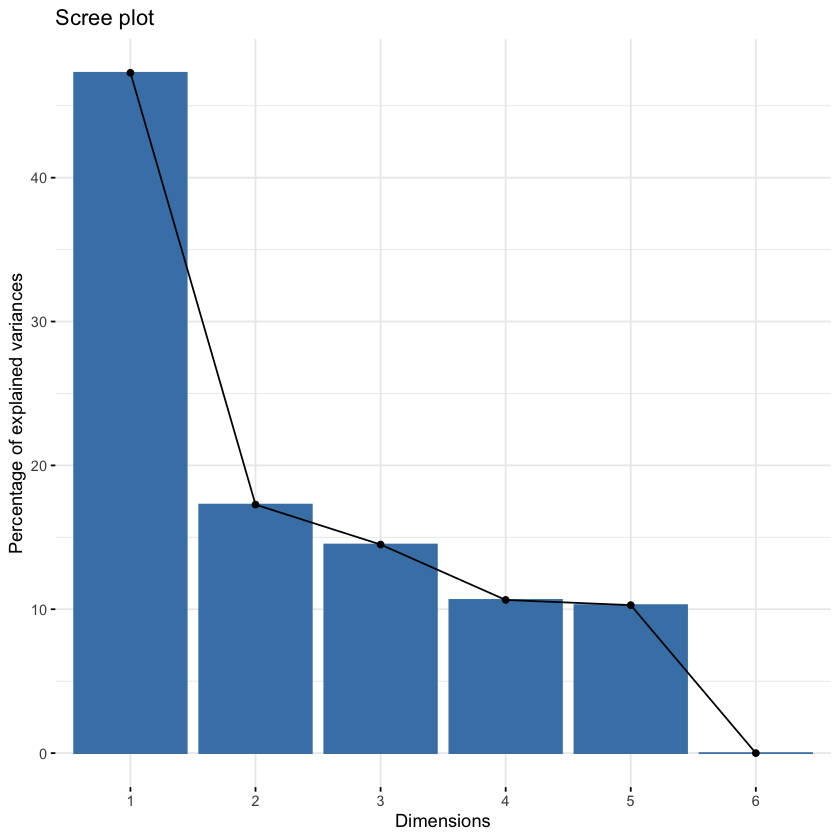

In [25]:
#barplot(aco$eig)
attributes(aco)$class<-c("pca","dudi")
fviz_eig(aco)

In [26]:
aco<-redo.dudi(aco,newnf=3)
aco

Duality diagramm
class: pco dudi
$call: dudi.pco(d = D, scannf = FALSE, nf = 3)

$nf: 3 axis-components saved
$rank: 6
eigen values: 2.831 1.034 0.868 0.6374 0.6159 ...
  vector length mode    content       
1 $cw    6      numeric column weights
2 $lw    445    numeric row weights   
3 $eig   6      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       445  6    modified array      
2 $li        445  3    row coordinates     
3 $l1        445  3    row normed scores   
4 $co        6    3    column coordinates  
5 $c1        6    3    column normed scores
other elements: NULL

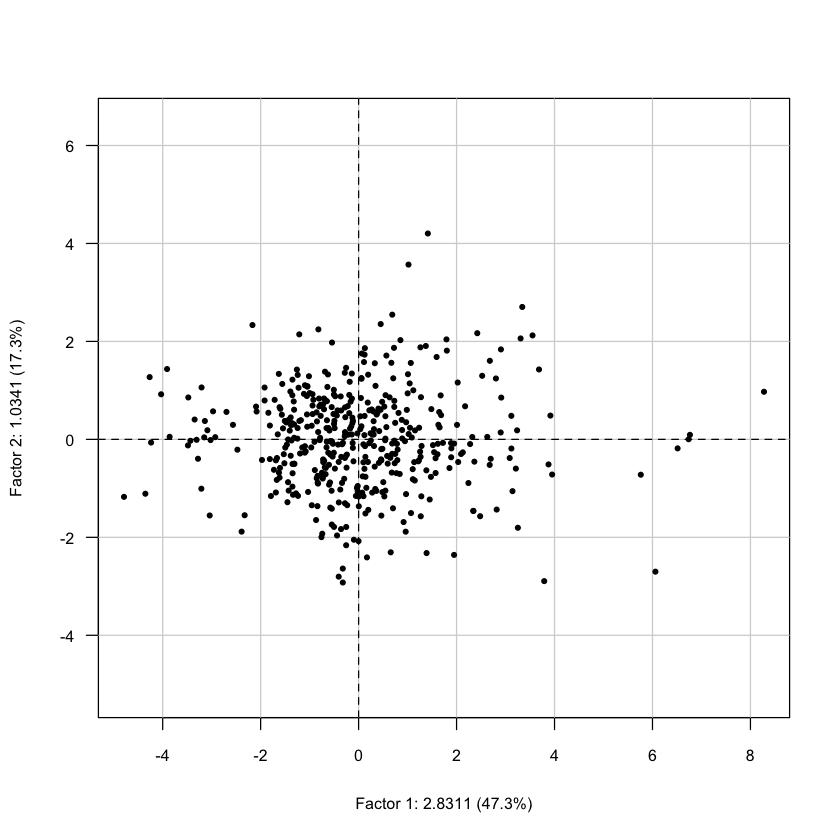

In [27]:
plot(aco,Tcol=FALSE,roweti="",cframe=1)

Warning message:
“ggrepel: 379 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


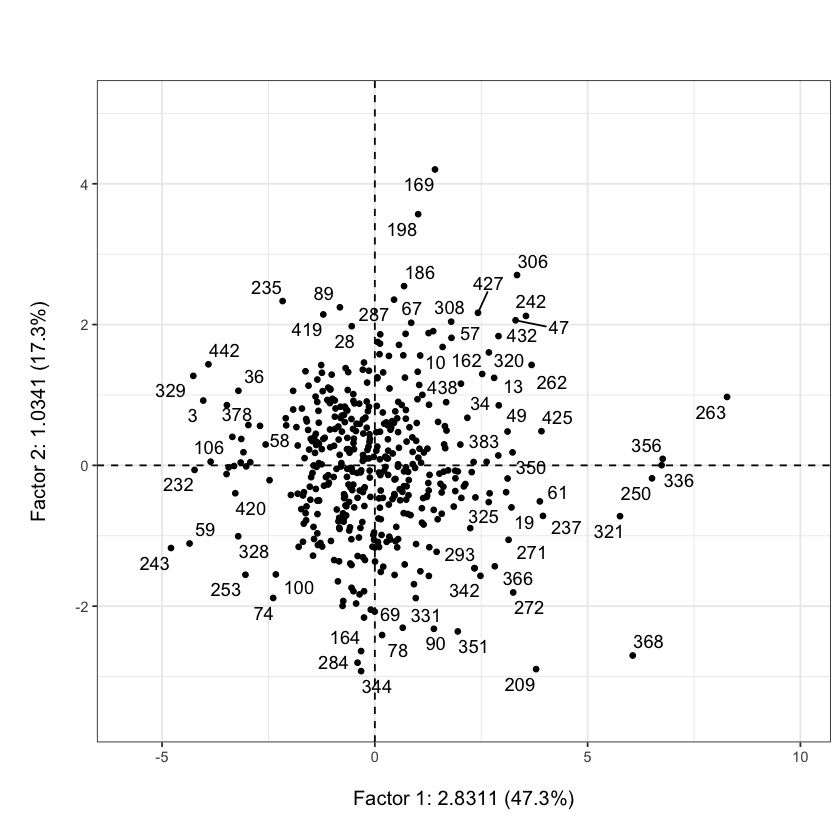

In [28]:
plot(aco,gg=TRUE,Tcol=FALSE)

Warning message:
“Removed 175 rows containing missing values (geom_point).”
Warning message:
“Removed 175 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 125 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


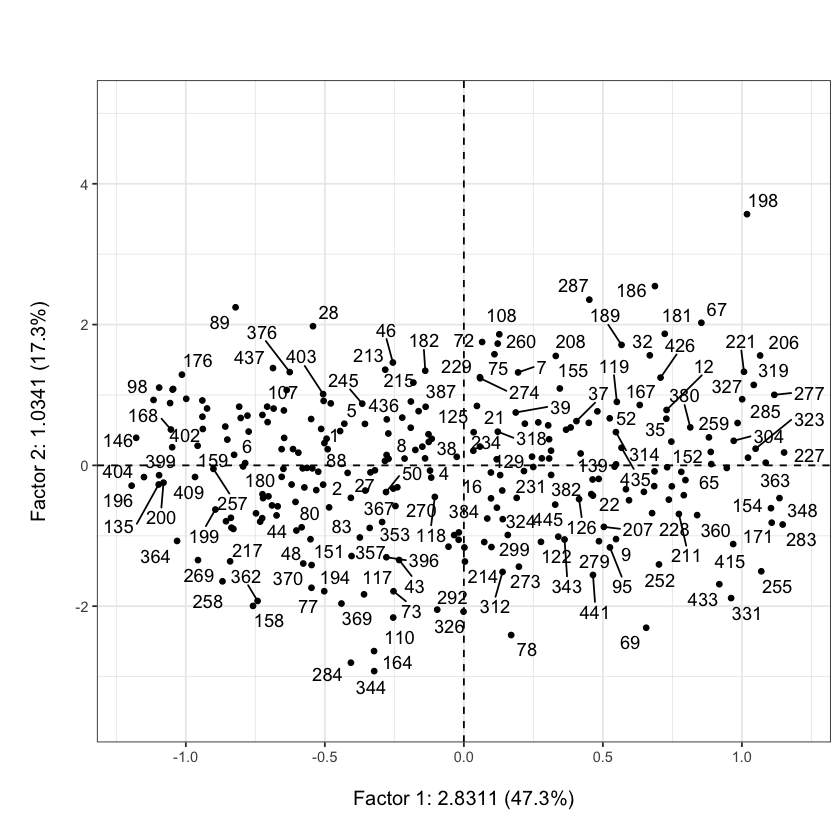

In [29]:
plot(aco,gg=TRUE,Tcol=FALSE,xlim=c(-1,1))

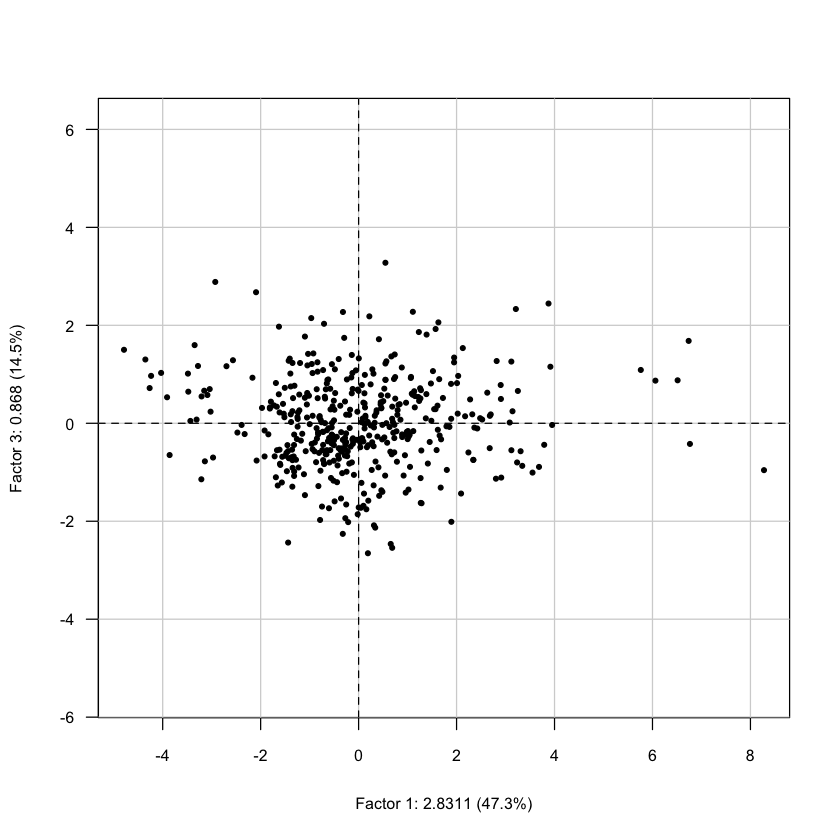

In [30]:
plot(aco,1,3,Tcol=FALSE,roweti="",cframe=1)

## Ejemplo pequeño: ACO de café con todas las variables

In [31]:
data(cafe)
head(cafe,1)

,Color,DA,EA,pH,AcidezT,Cafeina,AcidosCl,D2325,D2272,Intensidad,Aroma,Cuerpo,Acidez,Amargo,Astringencia,Impresion
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ExCl,298,385.1,25,5.02,11.7,1.4,2.74,-0.101,-0.057,7.72,7,6.84,5.02,5.04,5.36,7.46


In [32]:
# cálculo de D
D=dist(scale(cafe))
round(D,2)

     ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C Com1
C40M 8.67                                                  
C40C 7.44 2.48                                             
C20M 5.71 4.02 3.29                                        
C20C 4.47 5.34 3.67 2.79                                   
ExOs 4.25 9.24 7.47 6.80 5.36                              
O40M 9.62 4.01 3.80 5.77 6.42 8.75                         
O40C 7.99 5.03 3.47 5.31 5.17 6.57 3.67                    
O20M 6.15 6.00 4.19 4.80 4.03 4.18 5.07 3.03               
O20C 5.50 6.69 5.02 5.22 4.29 3.49 5.74 3.65 2.10          
Com1 5.89 6.55 5.55 5.08 4.27 5.51 6.75 6.09 4.74 4.32     
Com2 4.81 7.98 6.91 5.76 4.63 5.74 8.48 7.32 5.92 5.51 3.69

In [33]:
#ACO
aco<-dudi.pco(D,scannf=F)
aco

Duality diagramm
class: pco dudi
$call: dudi.pco(d = D, scannf = F)

$nf: 2 axis-components saved
$rank: 11
eigen values: 8.026 3.257 1.732 0.5138 0.4083 ...
  vector length mode    content       
1 $cw    11     numeric column weights
2 $lw    12     numeric row weights   
3 $eig   11     numeric eigen values  

  data.frame nrow ncol content             
1 $tab       12   11   modified array      
2 $li        12   2    row coordinates     
3 $l1        12   2    row normed scores   
4 $co        11   2    column coordinates  
5 $c1        11   2    column normed scores
other elements: NULL

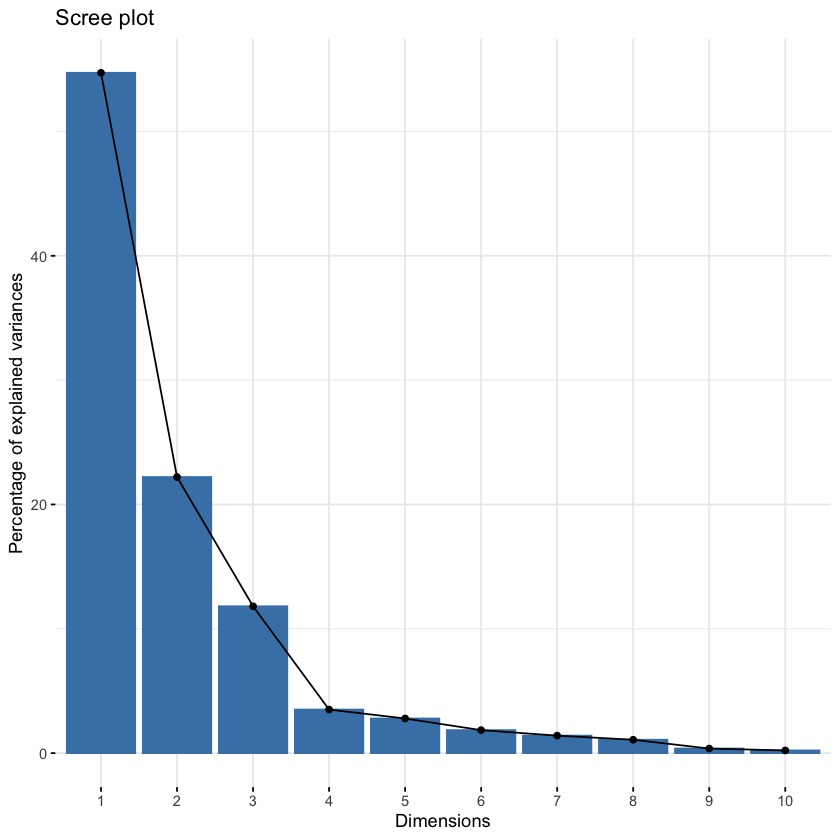

In [34]:
#barplot(aco$eig)
attributes(aco)$class<-c("pca","dudi")
fviz_eig(aco)

In [35]:
round(inertia(aco)$tot.inertia,2)

,inertia,cum,cum(%)
,<dbl>,<dbl>,<dbl>
Ax1,8.03,8.03,54.72
Ax2,3.26,11.28,76.93
Ax3,1.73,13.01,88.74
Ax4,0.51,13.53,92.24
Ax5,0.41,13.94,95.02
Ax6,0.27,14.21,96.87
Ax7,0.21,14.41,98.28
Ax8,0.16,14.57,99.35
Ax9,0.05,14.63,99.72


In [36]:
aco<-redo.dudi(aco,newnf=3)

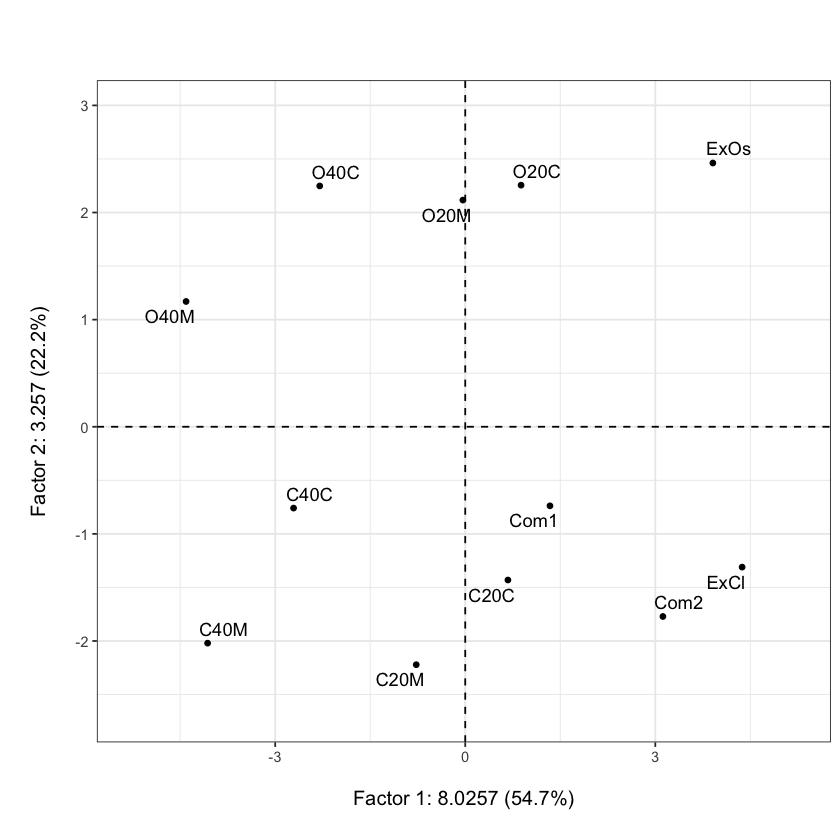

In [37]:
plot(aco,gg=T,Tcol=FALSE)

**Imagen de la matriz de covarianzas de las variables de degustación**

In [38]:
tail(cafe,1)
dim(cafe)

,Color,DA,EA,pH,AcidezT,Cafeina,AcidosCl,D2325,D2272,Intensidad,Aroma,Cuerpo,Acidez,Amargo,Astringencia,Impresion
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Com2,264,400.9,23,5.2,11.5,1.35,2.84,-0.096,-0.051,6.66,6.26,7.36,4.44,5.64,5.24,6


[1] 12 16

Sea la matriiz de covarianzas

In [39]:
nr<-nrow(cafe)
V<-covfacwt(cafe[,10:16])
"varianzas"
round(diag(V),3)
"covarianzas"
round(as.dist(V),3)

[1] "varianzas"

Intensidad        Aroma       Cuerpo       Acidez       Amargo Astringencia 
       0.245        0.363        0.103        0.085        0.112        0.039 
   Impresion 
       0.359

[1] "covarianzas"

             Intensidad Aroma Cuerpo Acidez Amargo Astringencia
Aroma             0.244                                        
Cuerpo            0.081 0.077                                  
Acidez            0.123 0.113  0.039                           
Amargo            0.056 0.047  0.088  0.035                    
Astringencia      0.059 0.047  0.045  0.028  0.043             
Impresion         0.224 0.306  0.043  0.101  0.031        0.048

,Intensidad,Aroma,Cuerpo,Acidez,Amargo,Astringencia,Impresion
Intensidad,0.24526667,0.24390000,0.08090000,0.12253333,0.05570000,0.05896667,0.22433333
Aroma,0.24390000,0.36253333,0.07670000,0.11273333,0.04713333,0.04660000,0.30580000
Cuerpo,0.08090000,0.07670000,0.10329722,0.03918889,0.08778333,0.04454722,0.04305833
Acidez,0.12253333,0.11273333,0.03918889,0.08522222,0.03476667,0.02802222,0.10096667
Amargo,0.05570000,0.04713333,0.08778333,0.03476667,0.11170000,0.04328333,0.03108333
Astringencia,0.05896667,0.04660000,0.04454722,0.02802222,0.04328333,0.03896389,0.04810833
Impresion,0.22433333,0.30580000,0.04305833,0.10096667,0.03108333,0.04810833,0.35874167


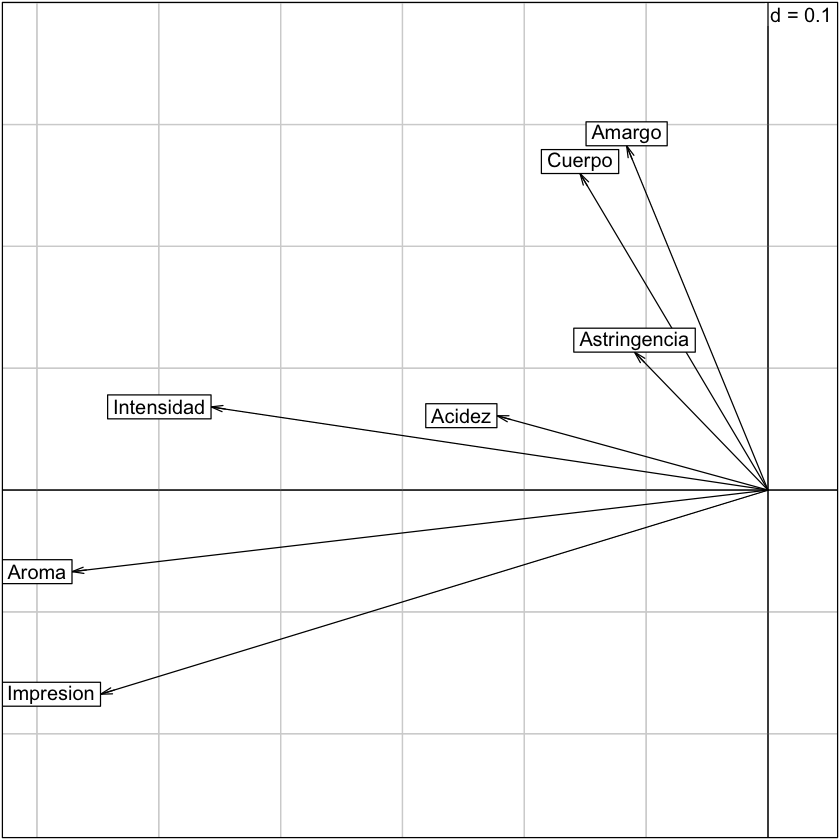

In [40]:
V # matriz de varianzas y covarianzas
eigV <- eigen(V)
Lambda<-diag(eigV$values)
U<-eigV$vectors
G<-U%*%sqrt(Lambda)
rownames(G)<-colnames(V)
library(ade4)
s.arrow(G)

In [41]:
# desviaciones estándar
round(sqrt(diag(V)),3)

Intensidad        Aroma       Cuerpo       Acidez       Amargo Astringencia 
       0.495        0.602        0.321        0.292        0.334        0.197 
   Impresion 
       0.599

In [42]:
# matriz de correlacines de las 16 variables de cafe
head(cafe,1)
dim(cafe)
# matriz de correlaciones
V<-cor(cafe)
as.dist(round(V,3))

,Color,DA,EA,pH,AcidezT,Cafeina,AcidosCl,D2325,D2272,Intensidad,Aroma,Cuerpo,Acidez,Amargo,Astringencia,Impresion
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ExCl,298,385.1,25,5.02,11.7,1.4,2.74,-0.101,-0.057,7.72,7,6.84,5.02,5.04,5.36,7.46


[1] 12 16

              Color     DA     EA     pH AcidezT Cafeina AcidosCl  D2325  D2272
DA            0.726                                                            
EA            0.266  0.422                                                     
pH           -0.665 -0.271  0.388                                              
AcidezT       0.002 -0.267 -0.954 -0.581                                       
Cafeina      -0.380 -0.518 -0.973 -0.276   0.900                               
AcidosCl     -0.042 -0.336 -0.950 -0.510   0.978   0.907                       
D2325        -0.452 -0.043  0.716  0.822  -0.874  -0.602   -0.859              
D2272         0.627  0.583  0.801  0.050  -0.634  -0.875   -0.626  0.241       
Intensidad   -0.366 -0.736 -0.583 -0.204   0.549   0.654    0.595 -0.367 -0.578
Aroma        -0.508 -0.760 -0.311  0.173   0.225   0.442    0.353 -0.036 -0.401
Cuerpo       -0.613 -0.566 -0.789 -0.002   0.655   0.757    0.671 -0.335 -0.701
Acidez       -0.232 -0.598 -0.656 -0.444

,Color,DA,EA,pH,AcidezT,Cafeina,AcidosCl,D2325,D2272,Intensidad,Aroma,Cuerpo,Acidez,Amargo,Astringencia,Impresion
Color,1.000000000,0.72608045,0.2655168,-0.664989092,0.002287945,-0.3802631,-0.04214682,-0.45193032,0.62722322,-0.3661793,-0.5077944,-0.613201001,-0.2320134,-0.53501222,-0.5322400,-0.43679147
DA,0.726080448,1.00000000,0.4220022,-0.271180104,-0.266842988,-0.5184353,-0.33610808,-0.04310889,0.58347569,-0.7355702,-0.7598249,-0.565610954,-0.5980928,-0.51715804,-0.5489917,-0.61704111
EA,0.265516842,0.42200223,1.0000000,0.387882445,-0.954478046,-0.9732152,-0.94992155,0.71642014,0.80051533,-0.5833994,-0.3105690,-0.789135904,-0.6560721,-0.71350324,-0.7831723,-0.13204674
pH,-0.664989092,-0.27118010,0.3878824,1.000000000,-0.580640830,-0.2755626,-0.51004644,0.82242480,0.05034026,-0.2040770,0.1728121,-0.001708335,-0.4435831,0.01952789,0.0422480,0.14710412
AcidezT,0.002287945,-0.26684299,-0.9544780,-0.580640830,1.000000000,0.9004189,0.97811671,-0.87437410,-0.63359180,0.5485971,0.2245420,0.654761334,0.6097681,0.58449020,0.6824168,0.08321881
Cafeina,-0.380263122,-0.51843533,-0.9732152,-0.275562625,0.900418938,1.0000000,0.90708838,-0.60208210,-0.87524817,0.6537860,0.4420606,0.756789126,0.7165013,0.66428897,0.8115862,0.26188625
AcidosCl,-0.042146817,-0.33610808,-0.9499216,-0.510046438,0.978116706,0.9070884,1.00000000,-0.85872346,-0.62570759,0.5945849,0.3534648,0.671141845,0.6437251,0.59662603,0.6897642,0.16159540
D2325,-0.451930320,-0.04310889,0.7164201,0.822424801,-0.874374099,-0.6020821,-0.85872346,1.00000000,0.24098197,-0.3672833,-0.0360495,-0.335097705,-0.4658046,-0.30783184,-0.3611442,0.07075736
D2272,0.627223218,0.58347569,0.8005153,0.050340260,-0.633591798,-0.8752482,-0.62570759,0.24098197,1.00000000,-0.5781307,-0.4012921,-0.701242319,-0.7029647,-0.58771077,-0.7919234,-0.33243226
Intensidad,-0.366179315,-0.73557022,-0.5833994,-0.204076957,0.548597051,0.6537860,0.59458490,-0.36728330,-0.57813072,1.0000000,0.8179346,0.508258834,0.8475368,0.33651881,0.6031928,0.75628177


Warning message in sqrt(Lambda):
“NaNs produced”


[1]  8.755310e+00  3.553087e+00  1.889369e+00  5.605313e-01  4.453968e-01
 [6]  2.956916e-01  2.250645e-01  1.720937e-01  5.871148e-02  3.445088e-02
[11]  1.029328e-02  1.724557e-16  1.251861e-16  8.533631e-17 -2.755204e-17
[16] -1.978817e-16

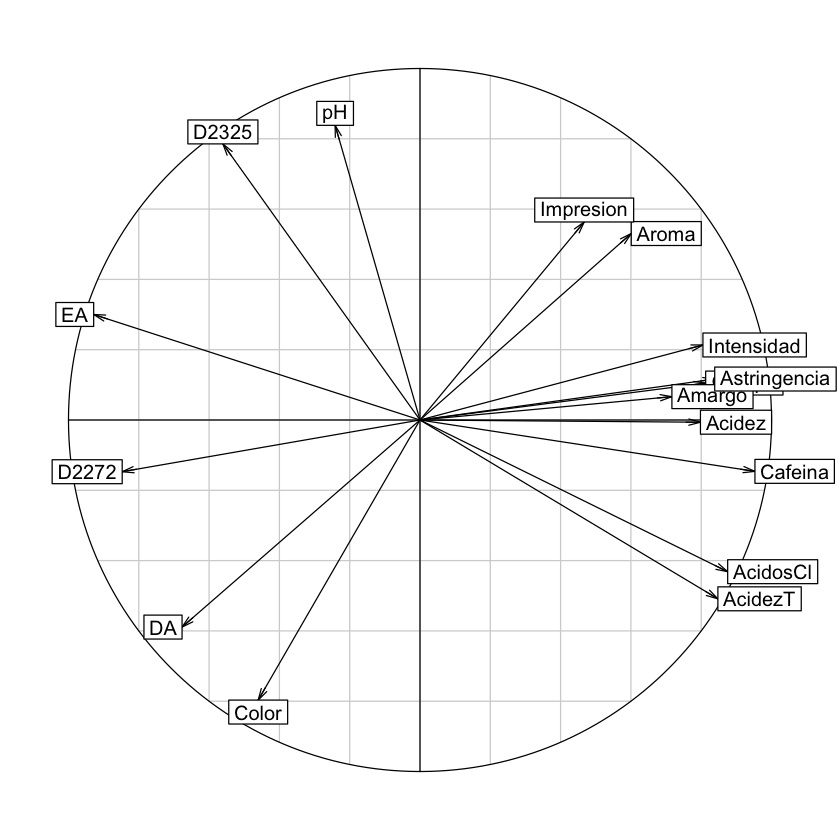

In [44]:
V # matriz de varianzas y covarianzas
eigV <- eigen(V)
Lambda<-diag(eigV$values)
U<-eigV$vectors
G<-U%*%sqrt(Lambda)
rownames(G)<-colnames(V)
eigV$values
library(ade4)
s.corcircle(G)

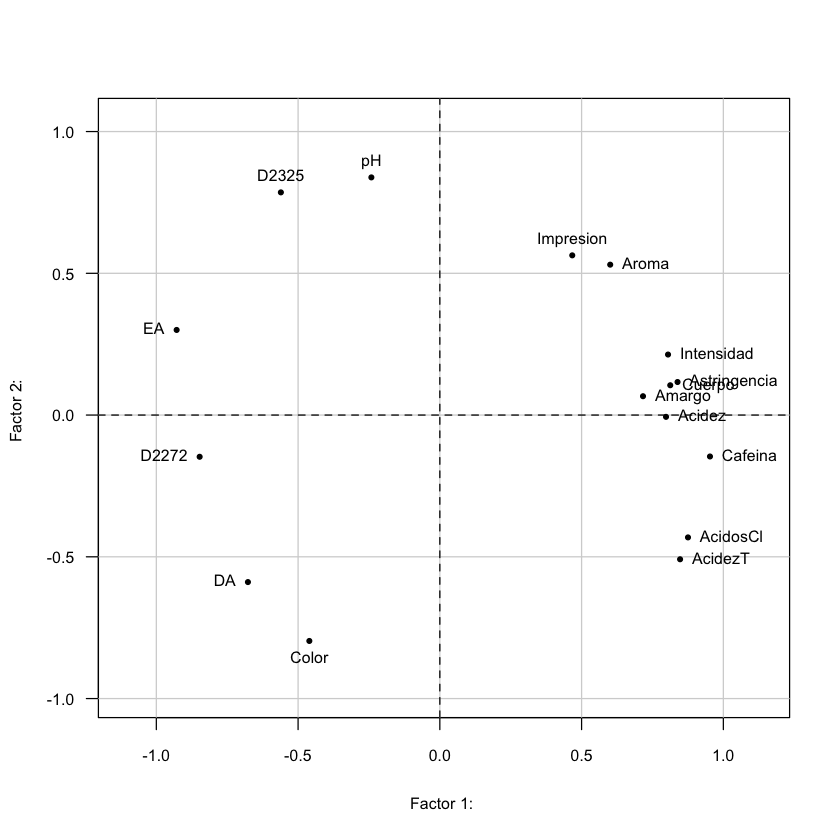

In [48]:
plotfp(G)#para ver las variables que quedaron tapadas

Cuerpo está debajo de Astringencia y Amargo

# Análisis de correspondencias simples (ACS)

# Análisis de correspondencias múltiples (ACM)

## Objetivos del ACM

- Describir las asociaciones entre las categorías de las variables activa. 
- Descubrir patrones de individuos, que pueden dar origen a grupos de ellos.
- Sintetizar en imágenes geométricas (planos factoriales) las asociaciones entre categorías y los posibles grupos de individuos.
- Explorar la explicación de la estructura inducida por las categorías activas, con variables que juegan el papel de ilustrativas.

Adicionalmente:

- Cuantificar las variables cualitativas.  
- Reducir de dimensión.
- Filtrar: conservar la información y eliminar el ruido.

El ACM es una extensión del ACS con propiedades muy particulares. 


# **Ejemplo "de juguete", notación y transformaciones de la tabla de datos**

#### Ejemplo: descripción de admitidos según algunas variables sociodemográficas,  notación y transformaciones de datos

- Descripción de los 445 admitidos a la Facultad de Ciencias, para el semestre de 2013-I.
- Datos disponibles en *admi{FactoClass}*
- Se utilizan como variables activas las sociodemográficas disponibles: 
    - Género: Femenino, Masculino
    - Edad: 16 o menos, 17, 18, 19 o más
    - Estrato: bajo, medio, alto
    - Procedencia: Bogotá, Cundinamarca, Otro
    
### Notación

- La tabla de datos se denomina *de código condensado* (denotada por **Y** y no tiene significado numérico). 
- Las $n$ filas representan a los individuos y 
- las $s$ columnas a las variables cualitativas. 
- En el lenguaje de diseño de experimentos las columnas son factores
- Las categorías son los niveles de los factores. 
- En R estas variables son de tipo factor.

## Tabla de datos del ejemplo Admitidos

In [52]:
data(admi)
print("Names")
names(admi)

Y<-admi[,8:11] #tomamos las columnas genero, estrato, origen y edad
paste("Dimensión de Y:",dim(Y)[1],"x",dim(Y)[2])

[1] "Names"


[1] "carr" "mate" "cien" "soci" "text" "imag" "exam" "gene" "estr" "orig"
[11] "edad" "niLE" "niMa" "stra" "age"

[1] "Dimensión de Y: 445 x 4"

In [54]:
# estracto de la tabla: múltiplo de 25
sel<-seq(25,425,25)
sel
Y[sel,]

[1]  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425

,gene,estr,orig,edad
,<fct>,<fct>,<fct>,<fct>
25,F,medio,Otro,a17
50,M,bajo,Bogo,a18
75,M,bajo,Bogo,a17
100,M,medio,Bogo,a18
125,F,medio,Otro,a17
150,F,bajo,Bogo,a16m
175,M,alto,Bogo,a19M
200,F,bajo,Otro,a17
225,M,alto,Otro,a16m


### Tabla disyuntiva completa (TDC): **Z** 

In [56]:
Z<-acm.disjonctif(Y)
print("Dimensión de Z:")
dim(Z)
names(Z)<-substr(names(Z),6,8)
Z[sel,] #sel<-seq(25,425,25)

[1] "Dimensión de Z:"


[1] 445  12

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,1,0,0,1,0,0,0,1,0,1,0,0
50,0,1,1,0,0,1,0,0,0,0,1,0
75,0,1,1,0,0,1,0,0,0,1,0,0
100,0,1,0,1,0,1,0,0,0,0,1,0
125,1,0,0,1,0,0,0,1,0,1,0,0
150,1,0,1,0,0,1,0,0,1,0,0,0
175,0,1,0,0,1,1,0,0,0,0,0,1
200,1,0,1,0,0,0,0,1,0,1,0,0
225,0,1,0,0,1,0,0,1,1,0,0,0


In [57]:
data.frame(Y,Z)[sel,]

,gene,estr,orig,edad,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,F,medio,Otro,a17,1,0,0,1,0,0,0,1,0,1,0,0
50,M,bajo,Bogo,a18,0,1,1,0,0,1,0,0,0,0,1,0
75,M,bajo,Bogo,a17,0,1,1,0,0,1,0,0,0,1,0,0
100,M,medio,Bogo,a18,0,1,0,1,0,1,0,0,0,0,1,0
125,F,medio,Otro,a17,1,0,0,1,0,0,0,1,0,1,0,0
150,F,bajo,Bogo,a16m,1,0,1,0,0,1,0,0,1,0,0,0
175,M,alto,Bogo,a19M,0,1,0,0,1,1,0,0,0,0,0,1
200,F,bajo,Otro,a17,1,0,1,0,0,0,0,1,0,1,0,0
225,M,alto,Otro,a16m,0,1,0,0,1,0,0,1,1,0,0,0


- La TDC **Z** es una yuxtaposición de *s* tablas, donde *s* es el número de variables:
$$\mathbf{Z}=[\mathbf{Z}_1 \ \mathbf{Z}_2 \ \cdots \mathbf{Z}_q \ \cdots \ \mathbf{Z}_s]$$
    - Una variable cualitativa $q$  $\rightarrow$ Genera partición  de los $n$ individuos en $p_q$ grupos,  $p_q$ = número de categorías de la variable $q$. 
    - En cada fila de $\mathbf{Z}_q$ siempre hay un 1 y sólo un 1. 
    - La suma en cada fila de $\mathbf{Z}_q$  es de 1. 
    - Como hay $s$ submatrices $\mathbf{Z}_q$, la suma de cada fila de $\mathbf{Z}$ es $s$, es decir que su marginal fila es un vector de $n$ veces $s$ 
    - El total de **Z** es $ns$. 
    - En el ejemplo $s=4$,  $n=445$ y el total de la tabla $4*445=1780$.
    - La suma de cada columna de **Z** es el número de individuos que asumen la categoría $j$ que se denota $n_j$. 
    - La $\sum\limits_{j \in Z_q} n_j = n$. $Z_q$ es el conjunto de categorías de la variable $q$. 


### Tabla de Burt

In [58]:
Z<-as.matrix(Z)
B<-t(Z)%*%Z
B

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
F,128,0,46,59,23,89,9,30,46,45,18,19
M,0,317,133,126,58,222,29,66,72,126,38,81
baj,46,133,179,0,0,95,22,62,44,58,22,55
med,59,126,0,185,0,151,11,23,47,74,26,38
alt,23,58,0,0,81,65,5,11,27,39,8,7
Bog,89,222,95,151,65,311,0,0,70,116,47,78
Cun,9,29,22,11,5,0,38,0,9,19,2,8
Otr,30,66,62,23,11,0,0,96,39,36,7,14
a16,46,72,44,47,27,70,9,39,118,0,0,0
a17,45,126,58,74,39,116,19,36,0,171,0,0


### El ACM como un ACS de la TDC

De ahora en adelante  el término análisis de correspondencias simples (ACS) es sinónimo de  análisis de correspondencias(AC), entonces el ACM es el AC de la tabla disyuntiva completa (TDC) **Z** y escribimos $AC(\mathbf{Z})$

- Tabla de frecuencias relativas: $$\mathbf{F}=\dfrac{1}{ns}\mathbf{Z}$$
- Marginales fila:  $$f_{i\cdot}=\dfrac{1}{n};  \forall i$$ 
- Marginales columna:  $$f_{\cdot j}=\dfrac{n_j}{ns}; \forall j$$


### Distancia entre individuos 
$$
d^2(i,l)=\frac{n}{s} \sum_{j=1}^p \frac{1}{n_j} \left(z_{ij}-z_{lj} \right)^2 
$$

- Si dos individuos se parecen = asumen más o menos las mismas categorías. 
- La distancia se amplifica más cuando uno solo de los dos individuos asume una categoría de baja frecuencia.


### Inercia de la nube de individuos

$$
 \dfrac{p}{s} - 1
$$

- La inercia de la nube de puntos depende del cociente entre el número de categorías y el número de variables, no de los valores internos de la tabla, por lo tanto no tiene significado estadístico.

### ACM de admitidos

In [60]:

acm<-dudi.acm(Y,scannf=FALSE,nf=3)


####  Valores propios del ACM de admitidos

Inertia information:
Call: inertia.dudi(x = acm)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  0.3366  0.3366   16.83
Ax2  0.3128  0.6493   32.47
Ax3  0.2827  0.9320   46.60
Ax4  0.2471  1.1791   58.96
Ax5  0.2408  1.4199   71.00
Ax6  0.2293  1.6493   82.46
Ax7  0.2075  1.8568   92.84
Ax8  0.1432  2.0000  100.00

[1] "Promedio de valores propios"

[1] 0.25

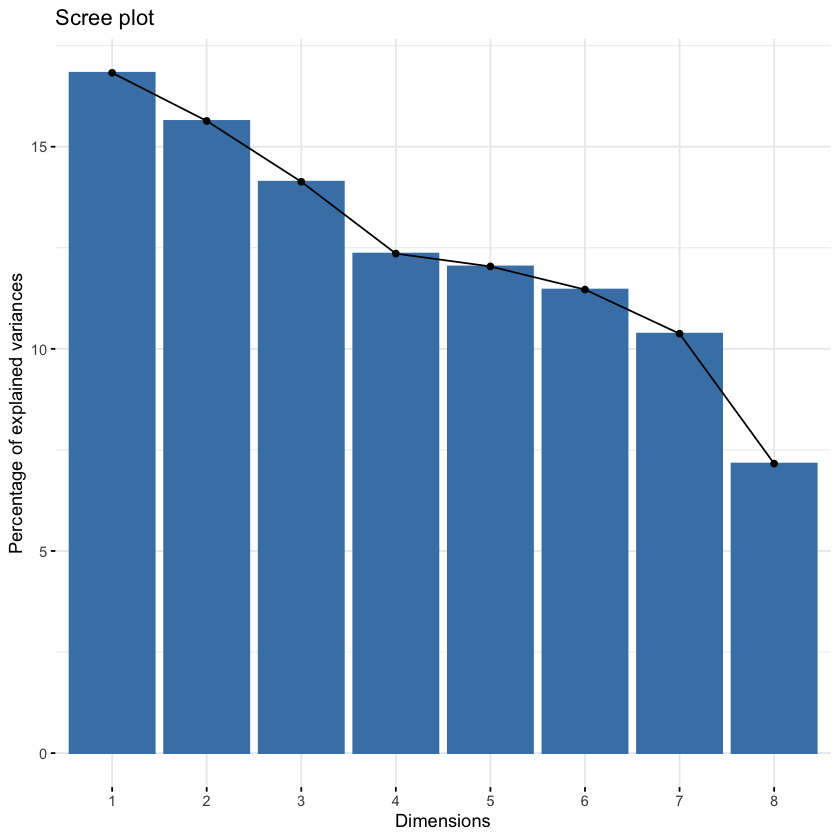

In [63]:
fviz_eig(acm)
inertia(acm)
"Promedio de valores propios"
sum(acm$eig)/acm$rank 

### Primer plano factorial del ACM de admitidos

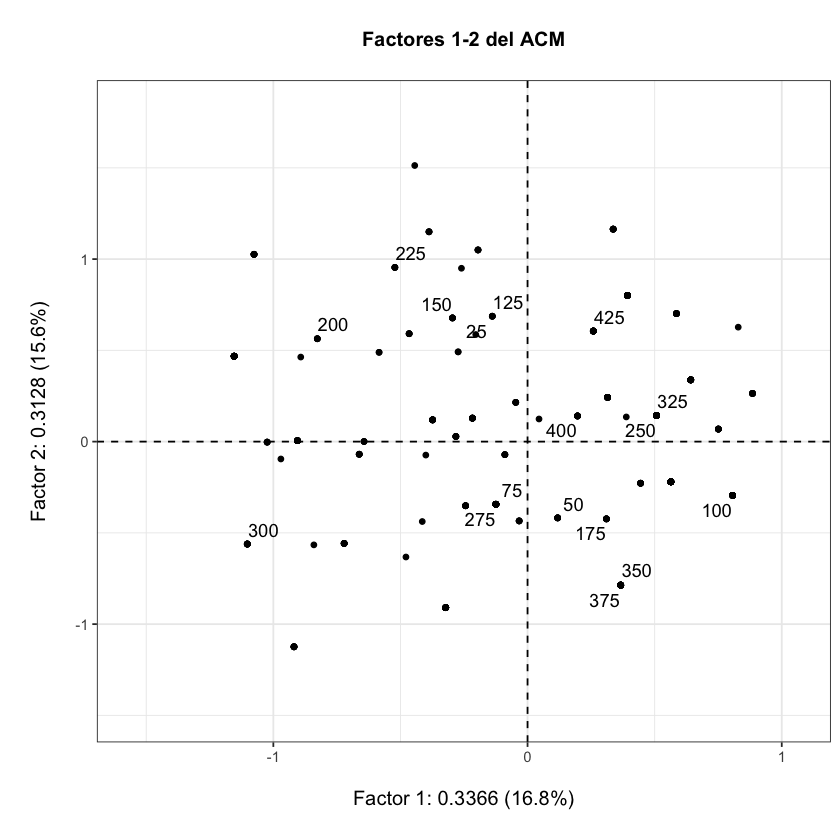

In [64]:
plot(acm,Tcol=FALSE,gg=TRUE,roweti=sel,main="Factores 1-2 del ACM")


### Nube de categorías

#### Centro de gravedad: es el vector de $n$ valores $\dfrac{1}{n}$

#### Distancia entre dos categorías

$$
d^2(j,k) = \sum_{i=1}^n n \left(\frac{z_{ij}}{n_j} - \frac{z_{ik}}{n_k}\right)^2
$$

**Interpretación de la distancia entre categorías**


                       Categoría k  
               
                     |   1  |  0   | suma
                     --------------------  
      Categoria   1  |   a  |  b   | n_j

         j        0  |   c  |  d   | c+d
                     -------------------- 
              suma   |  n_k | b+d  |  n
              
$$
d^2(j,k) =\frac{n}{n_j n_k} (b+c)
$$              

- En la distancia de dos categorías, sólo se suman los individuos que asumen una y solo una de las dos categorías. 
- Las categorías de baja frecuencia se alejan más de las demás.


### Contribución de categorías y variables a la inercia 

- Distancia entre la categoría $j$ y el centro de gravedad $\mathbf{g}_n=\dfrac{1}{n}\mathbf{1}_n$:

$$
d^2(j,\mathbf{g}_n) =   \frac{n}{n_j} - 1
$$

-  Las categorías de menos frecuencia son las más alejadas del origen

- $J_q$ es el conjunto de categorías que pertenecen la variable $q$. 


**Contribuciones a la inercia**

- De una categoría $j$: $ \dfrac{1}{s}\left(1-\dfrac{n_j}{n}\right) $, contribuyen más las categorías de baja frecuencia.
- De una variable $q$: $\sum\limits_{j \in J_q}  \dfrac{1}{s} \left(1-\dfrac{n_j}{n}\right) = 
\dfrac{1}{s}\left(p_q-\dfrac{n}{n}\right) = \dfrac{1}{s}\left(p_q-1\right)$,  contribuyen más las variables con más categorías
- Inercia total: $\sum\limits_{q=1}^s  \dfrac{1}{s}\left(p_q-1\right) = \dfrac{1}{s}(p-s) =\dfrac{p}{s}-1$. No tiene significado estadístico,  no depende de los valores de la tabla sino de la relación entre número de categorías y número de variables.


### Subespacio de proyección de las categorías

#### Primer plano factorial

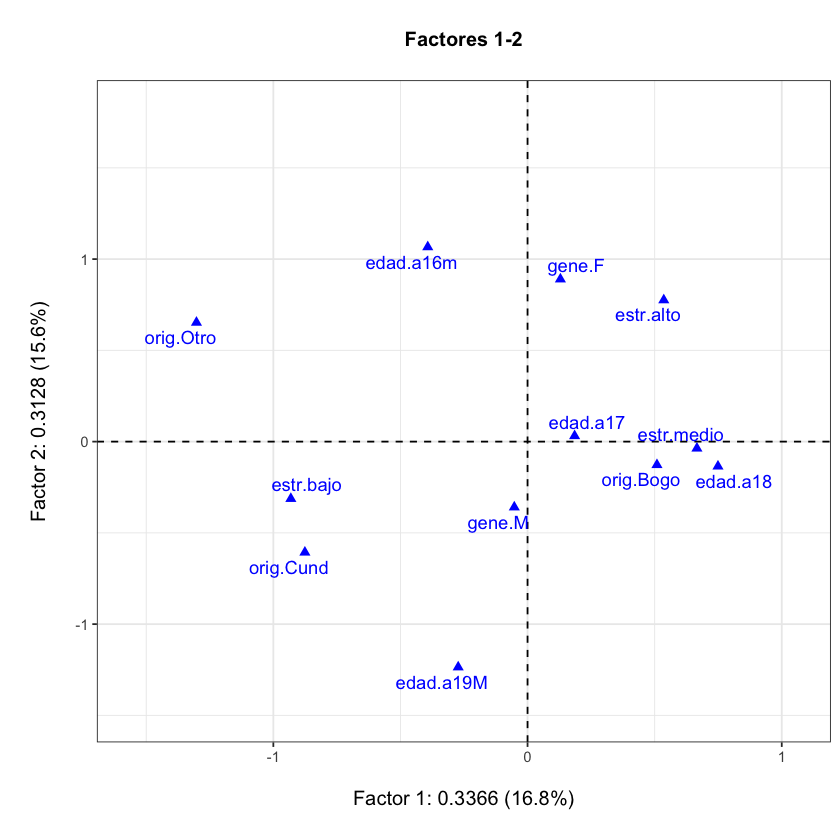

In [65]:
plot(acm,Trow=FALSE,gg=TRUE,main="Factores 1-2")